<center><font size = 5 color = "red"><b>DATA  PREPROCESSING</b></font></center>

### Problem Statement : To predict the user ratings for mobile phone based on its features

Data Source - https://www.91mobiles.com/

#### Importing Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, log_loss
import operator
import json
from IPython import display
import os
import warnings
import time
from tqdm import tqdm_notebook
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle
import statsmodels.api as sm
np.random.seed(0)
warnings.filterwarnings("ignore")

#### Importing Data

In [2]:
# read data from file
train = pd.read_csv("Data/Mobiledata_train.csv") 
test = pd.read_csv("Data/Mobiledata_test.csv")

# check the number of features and data points in train
print("Number of data points in train: %d" % train.shape[0])
print("Number of features in train: %d" % train.shape[1])

# check the number of features and data points in test
print("Number of data points in test: %d" % test.shape[0])
print("Number of features in test: %d" % test.shape[1])

Number of data points in train: 1420
Number of features in train: 99
Number of data points in test: 476
Number of features in test: 99


#### Analysing frequency of NAN Values

<IPython.core.display.Javascript object>

<AxesSubplot:>

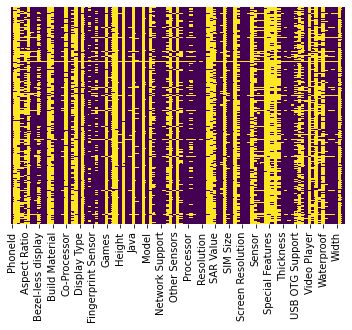

In [3]:
sns.heatmap(train.isnull(),cbar = False,yticklabels=False,cmap = "viridis")

In [4]:
train.isnull().sum()

PhoneId                 0
Also Known As        1352
Applications         1248
Architecture          328
Aspect Ratio          604
                     ... 
Wi-Fi                  84
Wi-Fi Features        104
Width                  60
Wireless Charging    1320
Rating                  0
Length: 99, dtype: int64

In [5]:
test.isna().sum()

PhoneId                0
Also Known As        452
Applications         436
Architecture         116
Aspect Ratio         180
                    ... 
Wi-Fi                 12
Wi-Fi Features        20
Width                 28
Wireless Charging    452
Rating                 0
Length: 99, dtype: int64

<b>Missing values:</b><br>
'Also Known As'(459),'Applications'(421),'Audio Features'(437),'Bezel-less display'(266),'Browser'(449),'Build Material'(338),'Co-Processor'(451),'Display Colour'(457),'Mobile High-Definition Link(MHL)'(472),'Music'(447)
'Email','Fingerprint Sensor Position'(174),'Games'(446),'HDMI'(454),'Heart Rate Monitor'(467),'IRIS Scanner'(467),
'Optical Image Stabilisation'(219),'Other Facilities'(444),'Phone Book'(444),'Physical Aperture'(87),'Quick Charging'(122),'Ring Tone'(444),'Ruggedness'(430),SAR Value(315),'SIM 3'(472),'SMS'(470)', 'Screen Protection'(229),'Screen to Body Ratio (claimed by the brand)'(428),'Sensor'(242),'Software Based Aperture'(473),
'Special Features'(459),'Standby time'(334),'Stylus'(473),'TalkTime'(259), 'USB Type-C'(374),'Video Player'(456),
'Video Recording Features'(458),'Waterproof'(398),'Wireless Charging','USB OTG Support'(159), 'Video ,'Recording'(113),'Java'(471),'Browser'(448)

<b>Very low variance:</b><br>
'Architecture'(most entries are 64-bit),'Audio Jack','GPS','Loudspeaker','Network','Network Support','Other Sensors'(28),'SIM Size', 'VoLTE'


<b>Multivalued:</b><br>
'Colours','Custom UI','Model'(1),'Other Sensors','Launch Date'

<b>Not important:</b><br>
'Bluetooth', 'Settings'(75),'Wi-Fi','Wi-Fi Features'

<b>Doubtful:</b><br>
'Aspect Ratio','Autofocus','Brand','Camera Features','Fingerprint Sensor'(very few entries are missing),
'Fingerprint Sensor Position', 'Graphics'(multivalued),'Image resolution'(multivalued),'SIM Size','Sim Slot(s)', 'User Available Storage', 'SIM 1', 'SIM 2','Shooting Modes', 'Touch Screen'(24), 'USB Connectivity'
    
<b>To check:</b><br>
'Display Type','Expandable Memory','FM Radio'

<b>High Correlation with other features</b><br>
'SIM Slot(s)' high correlation with SIM1
'Weight' has high high correlation with capacity , screen-to-body ratio
'Height' - screen size is also there
    
<b>Given a mobile, we can't directly get these features</b><br>
'Rating Count', 'Review Count'

<b>Keeping:</b><br>
'Capacity','Flash'(17),'Height'(22),'Internal Memory'(20, require cleaning),'Operating System'(25, require cleaning), 'Pixel Density'(1, clean it),'Processor'(22, clean it), 'RAM'(17, clean), 'Rating','Resolution'(cleaning), 'Screen Resolution','Screen Size', 'Thickness'(22), 'Type','User Replaceable','Weight'(cleaning),'Sim Size'(), 'Other Sensors'(28), 'Screen to Body Ratio (calculated)','Width',


## Data Cleaning

In [6]:
def data_clean1(data):
    
    # Let's first remove all missing value features
    columns_to_remove = ['Also Known As','Applications','Audio Features','Bezel-less display'
                         'Browser','Build Material','Co-Processor','Browser'
                         'Display Colour','Mobile High-Definition Link(MHL)',
                         'Music', 'Email','Fingerprint Sensor Position',
                         'Games','HDMI','Heart Rate Monitor','IRIS Scanner', 
                         'Optical Image Stabilisation','Other Facilities',
                         'Phone Book','Physical Aperture','Quick Charging',
                         'Ring Tone','Ruggedness','SAR Value','SIM 3','SMS',
                         'Screen Protection','Screen to Body Ratio (claimed by the brand)',
                         'Sensor','Software Based Aperture', 'Special Features',
                         'Standby time','Stylus','TalkTime', 'USB Type-C',
                         'Video Player', 'Video Recording Features','Waterproof',
                         'Wireless Charging','USB OTG Support', 'Video Recording','Java']

    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]
    d1 = data.sort_index(axis=1)
    #Features having very low variance 
    columns_to_remove = ['Architecture','Audio Jack','GPS','Loudspeaker','Network','Network Support','VoLTE']
    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]
    d2 = data.sort_index(axis=1)
    # Multivalued:
    columns_to_remove = ['Architecture','Launch Date','Audio Jack','GPS','Loudspeaker','Network','Network Support','VoLTE', 'Custom UI']
    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]
    d3 = data.sort_index(axis=1)
    # Not much important
    columns_to_remove = ['Bluetooth', 'Settings','Wi-Fi','Wi-Fi Features']
    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]
    
    return data

## Removing features

In [7]:
train = data_clean1(train)
test = data_clean1(test)

#### Removing all those data points in which more than 15 features are missing 

In [8]:
train = train[(train.isnull().sum(axis=1) <= 15)]

#### Reduction in dataframe shape

In [9]:
# check the number of features and data points in train
print("Number of data points in train: %d" % train.shape[0])
print("Number of features in train: %d" % train.shape[1])

# check the number of features and data points in test
print("Number of data points in test: %d" % test.shape[0])
print("Number of features in test: %d" % test.shape[1])

Number of data points in train: 1364
Number of features in train: 47
Number of data points in test: 476
Number of features in test: 47



## Filling Missing values

In [10]:
def for_integer(test):
    try:
        test = test.strip()
        return int(test.split(' ')[0])
    except IOError:
           pass
    except ValueError:
        pass
    except:
        pass

def for_string(test):
    try:
        test = test.strip()
        return (test.split(' ')[0])
    except IOError:
        pass
    except ValueError:
        pass
    except:
        pass

def for_float(test):
    try:
        test = test.strip()
        return float(test.split(' ')[0])
    except IOError:
        pass
    except ValueError:
        pass
    except:
        pass
def find_freq(test):
    try:
        test = test.strip()
        test = test.split(' ')
        if test[2][0] == '(':
            return float(test[2][1:])
        return float(test[2])
    except IOError:
        pass
    except ValueError:
        pass
    except:
        pass

    
def for_Internal_Memory(test):
    try:
        test = test.strip()
        test = test.split(' ')
        if test[1] == 'GB':
            return int(test[0])
        if test[1] == 'MB':
#             print("here")
            return (int(test[0]) * 0.001)
    except IOError:
           pass
    except ValueError:
        pass
    except:
        pass
    
def find_freq(test):
    try:
        test = test.strip()
        test = test.split(' ')
        if test[2][0] == '(':
            return float(test[2][1:])
        return float(test[2])
    except IOError:
        pass
    except ValueError:
        pass
    except:
        pass


### Filling Missing Values & Type Casting

In [11]:
def data_clean_2(x):
    data = x.copy()
    
    data['Capacity'] = data['Capacity'].apply(for_integer)

    data['Height'] = data['Height'].apply(for_float)
    data['Height'] = data['Height'].fillna(data['Height'].mean())

    data['Internal Memory'] = data['Internal Memory'].apply(for_Internal_Memory)

    data['Pixel Density'] = data['Pixel Density'].apply(for_integer)

    data['Internal Memory'] = data['Internal Memory'].fillna(data['Internal Memory'].median())
    data['Internal Memory'] = data['Internal Memory'].astype(int)

    data['RAM'] = data['RAM'].apply(for_integer)
    data['RAM'] = data['RAM'].fillna(data['RAM'].median())
    data['RAM'] = data['RAM'].astype(int)

    data['Resolution'] = data['Resolution'].apply(for_integer)
    data['Resolution'] = data['Resolution'].fillna(data['Resolution'].median())
    data['Resolution'] = data['Resolution'].astype(int)

    data['Screen Size'] = data['Screen Size'].apply(for_float)

    data['Thickness'] = data['Thickness'].apply(for_float)
    data['Thickness'] = data['Thickness'].fillna(data['Thickness'].mean())
    data['Thickness'] = data['Thickness'].round(2)

    data['Type'] = data['Type'].fillna('Li-Polymer')

    data['Screen to Body Ratio (calculated)'] = data['Screen to Body Ratio (calculated)'].apply(for_float)
    data['Screen to Body Ratio (calculated)'] = data['Screen to Body Ratio (calculated)'].fillna(data['Screen to Body Ratio (calculated)'].mean())
    data['Screen to Body Ratio (calculated)'] = data['Screen to Body Ratio (calculated)'].round(2)

    data['Width'] = data['Width'].apply(for_float)
    data['Width'] = data['Width'].fillna(data['Width'].mean())
    data['Width'] = data['Width'].round(2)

    data['Flash'][data['Flash'].isna() == True] = "Other"

    data['User Replaceable'][data['User Replaceable'].isna() == True] = "Other"

    data['Num_cores'] = data['Processor'].apply(for_string)
    data['Num_cores'][data['Num_cores'].isna() == True] = "Other"


    data['Processor_frequency'] = data['Processor'].apply(find_freq)
    #because there is one entry with 208MHz values, to convert it to GHz
    data['Processor_frequency'][data['Processor_frequency'] > 200] = 0.208
    data['Processor_frequency'] = data['Processor_frequency'].fillna(data['Processor_frequency'].mean())
    data['Processor_frequency'] = data['Processor_frequency'].round(2)

    data['Camera Features'][data['Camera Features'].isna() == True] = "Other"

    #simplifyig Operating System to os_name for simplicity
    data['os_name'] = data['Operating System'].apply(for_string)
    data['os_name'][data['os_name'].isna() == True] = "Other"

    data['Sim1'] = data['SIM 1'].apply(for_string)

    data['SIM Size'][data['SIM Size'].isna() == True] = "Other"

    data['Image Resolution'][data['Image Resolution'].isna() == True] = "Other"

    data['Fingerprint Sensor'][data['Fingerprint Sensor'].isna() == True] = "Other"

    data['Expandable Memory'][data['Expandable Memory'].isna() == True] = "No"

    data['Weight'] = data['Weight'].apply(for_integer)
    data['Weight'] = data['Weight'].fillna(data['Weight'].mean())
    data['Weight'] = data['Weight'].astype(int)

    data['Sim2'] = data['SIM 2'].apply(for_string)
    data['Sim2'][data['SIM 2'].isna() == True] = "Other"
    
    return data

In [12]:
train = data_clean_2(train)
test = data_clean_2(test)

# check the number of features and data points in train
print("Number of data points in train: %d" % train.shape[0])
print("Number of features in train: %d" % train.shape[1])

# check the number of features and data points in test
print("Number of data points in test: %d" % test.shape[0])
print("Number of features in test: %d" % test.shape[1])

Number of data points in train: 1364
Number of features in train: 52
Number of data points in test: 476
Number of features in test: 52


### Removing of unnecessary features

In [13]:
def data_clean_3(x):
    
    data = x.copy()

    columns_to_remove = ['User Available Storage','SIM Size','Chipset','Processor','Autofocus','Aspect Ratio','Touch Screen',
                        'Bezel-less display','Operating System','SIM 1','USB Connectivity','Other Sensors','Graphics','FM Radio',
                        'NFC','Shooting Modes','Browser','Display Colour','SIM Slot(s)','Screen to Body Ratio (calculated)','Brand','PhoneId',
                        'Resolution','Processor_frequency','Pixel Density','os_name','SIM 2']

    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]


    columns_to_remove = [ 'Screen Resolution','User Replaceable','Camera Features',
                        'Thickness', 'Display Type']

    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]


    columns_to_remove = ['Fingerprint Sensor', 'Flash', 'Rating Count', 'Review Count','Image Resolution','Type','Expandable Memory',\
                        'Colours','Width','Model']
    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]

    return data

In [14]:
train = data_clean_3(train)
test = data_clean_3(test)

# check the number of features and data points in train
print("Number of data points in train: %d" % train.shape[0])
print("Number of features in train: %d" % train.shape[1])

# check the number of features and data points in test
print("Number of data points in test: %d" % test.shape[0])
print("Number of features in test: %d" % test.shape[1])

Number of data points in train: 1364
Number of features in train: 10
Number of data points in test: 476
Number of features in test: 10


### Converting Categorical to numerical Data For easy intrepretation

In [15]:
train.loc[(train.Num_cores == 'Deca'),'Num_cores']=10
train.loc[(train.Num_cores == 'Octa'),'Num_cores']=8
train.loc[(train.Num_cores == 'Tru-Octa'),'Num_cores']=8
train.loc[(train.Num_cores == 'Hexa'),'Num_cores']=6
train.loc[(train.Num_cores == 'Quad'),'Num_cores']=4
train.loc[(train.Num_cores == 'Dual'),'Num_cores']=2
train.loc[(train.Num_cores == 'Other'),'Num_cores']=4
train.loc[(train.Sim2 == 'Other'),'Sim2']='3G'
train.loc[(train.Sim1 == '4G'),'Sim1']=4
train.loc[(train.Sim1 == '3G'),'Sim1']=3
train.loc[(train.Sim1 == '2G'),'Sim1']=2
train.loc[(train.Sim2 == '4G'),'Sim2']=4
train.loc[(train.Sim2 == '3G'),'Sim2']=3
train.loc[(train.Sim2 == '2G'),'Sim2']=2

In [16]:
train

,Height,Weight,Capacity,Sim2,Screen Size,Rating,Internal Memory,Num_cores,RAM,Sim1
0,157.9,182,4000,4,6.26,4.5,64,8,4,4
1,156.2,168,4230,4,6.20,4.5,32,8,3,4
2,157.0,168,3500,4,6.30,4.4,32,8,3,4
3,159.8,169,3300,4,6.00,4.3,64,8,4,4
4,160.4,175,3750,4,6.50,4.4,64,8,4,4
...,...,...,...,...,...,...,...,...,...,...
1415,142.7,141,2420,4,5.00,3.8,16,4,1,4
1416,156.5,165,3000,4,5.50,3.9,64,8,4,4
1417,149.7,160,3000,4,5.20,4.1,16,8,3,4
1418,132.0,156,1800,2,4.50,3.6,8,4,1,4


In [17]:
test.loc[(test.Num_cores == 'Deca'),'Num_cores']=10
test.loc[(test.Num_cores == 'Octa'),'Num_cores']=8
test.loc[(test.Num_cores == 'Tru-Octa'),'Num_cores']=8
test.loc[(test.Num_cores == 'Hexa'),'Num_cores']=6
test.loc[(test.Num_cores == 'Quad'),'Num_cores']=4
test.loc[(test.Num_cores == 'Dual'),'Num_cores']=2
test.loc[(test.Num_cores == 'Other'),'Num_cores']=4
test.loc[(test.Sim2 == 'Other'),'Sim2']='3G'
test.loc[(test.Sim1 == '4G'),'Sim1']=4
test.loc[(test.Sim1 == '3G'),'Sim1']=3
test.loc[(test.Sim1 == '2G'),'Sim1']=2
test.loc[(test.Sim2 == '4G'),'Sim2']=4
test.loc[(test.Sim2 == '3G'),'Sim2']=3
test.loc[(test.Sim2 == '2G'),'Sim2']=2

In [18]:
test

,Height,Weight,Capacity,Sim2,Screen Size,Rating,Internal Memory,Num_cores,RAM,Sim1
0,156.2,168,4230,4,6.20,4.4,16,8,2,4
1,156.0,205,5000,4,6.20,4.6,64,8,4,4
2,156.7,169,3500,4,6.30,4.4,64,8,6,4
3,156.7,169,3500,4,6.30,4.4,64,8,4,4
4,158.6,181,4000,4,5.99,4.4,64,8,4,4
...,...,...,...,...,...,...,...,...,...,...
471,152.0,167,4000,4,5.50,3.4,32,8,4,4
472,158.1,189,3500,4,6.20,4.5,256,8,6,4
473,151.8,171,3000,4,5.50,4.0,8,4,3,4
474,149.2,159,2700,2,5.20,3.9,32,4,2,4


In [19]:
# check the number of features and data points in train
print("Number of data points in train: %d" % train.shape[0])
print("Number of features in train: %d" % train.shape[1])

# check the number of features and data points in test
print("Number of data points in test: %d" % train.shape[0])
print("Number of features in test: %d" % test.shape[1])

Number of data points in train: 1364
Number of features in train: 10
Number of data points in test: 1364
Number of features in test: 10


## Hurray !! Data preprocessing done 

In [20]:
train.to_csv("Data/train_cleaned.csv",index = False)
test.to_csv("Data/test_cleaned.csv",index = False)

In [21]:
df_train = pd.read_csv("Data/train_cleaned.csv")
df_test = pd.read_csv("Data/test_cleaned.csv")

## Preparing Model
#### Perceptron Model

In [25]:
class Perceptron():
    def __init__(self):
        self.b = None
        self.w = None
    def model(self,x):
        return 1 if (np.dot(x,self.w) >= self.b)else 0
    def predict(self,x):
        y = []
        for x in x:
            result = self.model(x)
            y.append(result)
        return np.array(y)
    def fit(self,X,Y,epochs = 10,lr = 1):
        accu_score = { }
        highest_accu = 0
        self.w = np.ones(X.shape[1])
        self.b = 0
        for i in range(epochs):
            for x,y in zip(X,Y):
                y_pred = self.model(x)
                if y_pred == 0 and y == 1:
                    self.w = self.w+lr*x
                    self.b = self.b+lr*1
                if y_pred == 1 and y == 0:
                    self.w = self.w-lr*x
                    self.b = self.b-lr*1
            accu_score[i] = accuracy_score(self.predict(X),Y)
            if highest_accu < accu_score[i]:
                highest_accu = accu_score[i]
                best_w = self.w
                best_b = self.b
        self.b = best_b
        self.w = best_w
        print("Accuracy :",highest_accu)
        print("Epoch : ",max(accu_score,key = accu_score.get))
        plt.plot(list(accu_score.values()))

In [26]:
X_train = pd.DataFrame(df_train.drop("Rating",axis = 1))
y_train = pd.cut(df_train["Rating"],bins = 2 ,labels = [0,1])
X_test = pd.DataFrame(df_test.drop("Rating",axis = 1))
y_test =  pd.cut(df_test["Rating"],bins = 2 ,labels = [0,1])

In [27]:
X_train = X_train.values
y_train = y_train.values

Accuracy : 0.8533724340175953
Epoch :  191
Time Taken:  5.067695379257202


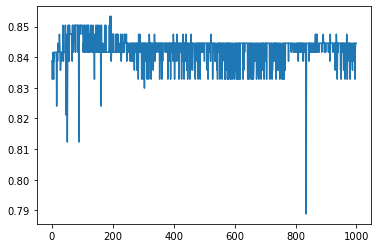

In [29]:
perceptron = Perceptron()
start = time.time()
perceptron.fit(X_train,y_train,1000,0.001)
end = time.time()
print("Time Taken: ",end-start)

In [30]:
X_train = pd.DataFrame(df_train.drop("Rating",axis = 1))
y_train =df_train["Rating"]
X_test = pd.DataFrame(df_test.drop("Rating",axis = 1))
y_test = df_test["Rating"]

In [31]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def grad_w_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y == 0:
      return y_pred * x
    elif y == 1:
      return -1 * (1 - y_pred) * x
    else:
      raise ValueError("y should be 0 or 1")
    
  def grad_b_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y == 0:
      return y_pred 
    elif y == 1:
      return -1 * (1 - y_pred)
    else:
      raise ValueError("y should be 0 or 1")
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, loss_fn="mse", display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        if loss_fn == "mse":
          dw += self.grad_w_mse(x, y)
          db += self.grad_b_mse(x, y) 
        elif loss_fn == "ce":
          dw += self.grad_w_ce(x, y)
          db += self.grad_b_ce(x, y)
      self.w -= learning_rate * dw
      self.b -= learning_rate * db
      
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        if loss_fn == "mse":
          loss[i] = mean_squared_error(Y, Y_pred)
        elif loss_fn == "ce":
          loss[i] = log_loss(Y, Y_pred)
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      if loss_fn == "mse":
        plt.ylabel('Mean Squared Error')
      elif loss_fn == "ce":
        plt.ylabel('Log Loss')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

In [32]:
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [33]:
def print_accuracy(sn):
  Y_pred_train = sn.predict(X_scaled_train)
  print(mean_squared_error(Y_pred_train,y_train))

## Linear regression

In [30]:
X_train = pd.DataFrame(df_train.drop("Rating",axis = 1))
y_train =df_train["Rating"]
X_test = pd.DataFrame(df_test.drop("Rating",axis = 1))
y_test = df_test["Rating"]

In [31]:
linear = LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [38]:
y_pred = linear.predict(X_test)

### Model Evaluation

In [39]:
model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                          1.732e+04
Date:                Wed, 09 Dec 2020   Prob (F-statistic):                        0.00
Time:                        14:14:06   Log-Likelihood:                         -614.39
No. Observations:                1364   AIC:                                      1247.
Df Residuals:                    1355   BIC:                                      1294.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Height              0.0292      0.002     17.284      0.000       0.026       0.033
Weight           5.412e-06      0.001      0.007      0.994      -0.001       0.001
Capacity        -5.968e-05   1.61e-05     -3.710      0.000   -9.12e-05   -2.81e-05
Sim2               -0.0015      0.015     -0.100      0.920      -0.030       0.027
Screen Size        -0.1011      0.030     -3.399      0.001      -0.159      -0.043
Internal Memory     0.0018      0.000      6.572      0.000       0.001       0.002
Num_cores           0.0016      0.001      2.477      0.013       0.000       0.003
RAM                -0.0007      0.000     -3.579      0.000      -0.001      -0.000
Sim1                0.0887      0.042      2.129      0.033       0.007       0.170
==============================================================================
Omnibus:                      146.835   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              243.310
Skew:                          -0.738   Prob(JB):                     1.47e-53
Kurtosis:                       4.450   Cond. No.                     1.36e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
print("Mean Squared error :",mean_squared_error(y_pred,y_test))

Mean Squared error : 0.04855302864129257


#### As Mean Squared Error tends to 0, Our model is a good predictor !!

In [41]:
pickle.dump(linear,open('model.pkl','wb'))

In [42]:
model = pickle.load(open('model.pkl','rb'))

In [45]:
model.predict([[157.9,182,4000,4,6.26,64,8,14,4]])

array([4.24252308])